## Observations and Insights 
My first observation is that, based on the 10 boxplots, Ramicane and Capomulin seem to result in smaller final tumor volume for the rates.  
My second observation, based on the “Average Tumor Volume vs. Weight for Capomulin” scatter plot with regression list, is that weight has a positive correlation with average tumor volume.  
My third observation, based on the bar graphs, is that although Propriva have the least amount of measurements, this did not appear to increase the amount of outliers


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
numofmice = len(combined_data["Mouse ID"])
numofuniquemice = combined_data["Mouse ID"].nunique()
numofmice, numofuniquemice

(1893, 249)

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedmice = combined_data[combined_data.duplicated(['Mouse ID', "Timepoint"])]
duplicatedmiceID = duplicatedmice.iloc[0,0]
cleaned_data = combined_data[combined_data["Mouse ID"] != duplicatedmiceID]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [7]:
# Checking the number of mice in the clean DataFrame.
numofmice = len(cleaned_data["Mouse ID"])
numofuniquemice = cleaned_data["Mouse ID"].nunique()
numofmice, numofuniquemice

(1880, 248)

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystatistics = cleaned_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'sem', "std"]})
summarystatistics.columns = ["Mean", "Median", "Variance", 'SEM', "Std. Deviation"]
summarystatistics = pd.DataFrame(summarystatistics)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summarystatistics

,Mean,Median,Variance,SEM,Std. Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.320930,50.446266,43.852013,0.544332,6.622085
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

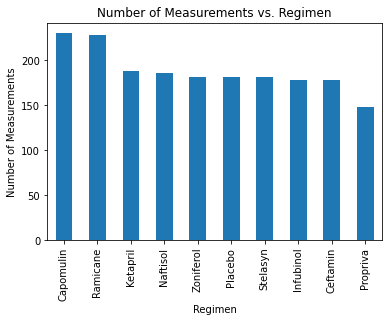

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
cleaned_data['Drug Regimen'].value_counts().plot(kind="bar")
#fix format and labels
plt.xlabel("Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements vs. Regimen")
plt.show()

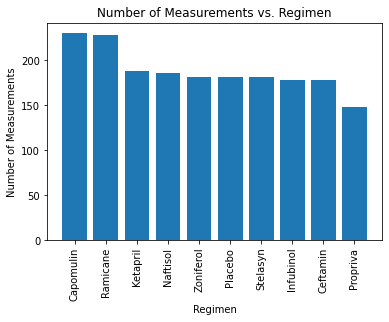

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x = cleaned_data['Drug Regimen'].value_counts()
lables = list(x.index)
plt.bar(lables, x)
plt.xticks(rotation = 90)
plt.xlabel("Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements vs. Regimen")
plt.show()
plt.show()


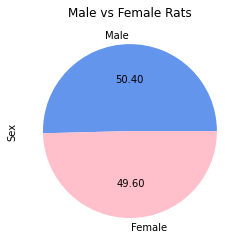

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderplot = cleaned_data.drop_duplicates(subset=['Mouse ID', 'Sex'])
genderplot['Sex'].value_counts().plot(kind="pie", autopct='%.2f', colors = ['cornflowerblue', 'pink'])
plt.title("Male vs Female Rats")
plt.show()

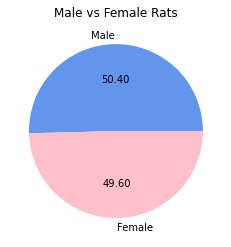

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x = genderplot['Sex'].value_counts()
plt.pie(x, labels = ["Male", "Female"], autopct='%.2f', colors = ['cornflowerblue', 'pink'])
plt.title("Male vs Female Rats")
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# group and clean data

cleaned_data2 = cleaned_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
cleaned_data3 = cleaned_data2[(cleaned_data2["Drug Regimen"] == "Capomulin") |
                        (cleaned_data2["Drug Regimen"] == "Ramicane") |
                        (cleaned_data2["Drug Regimen"] == "Infubinol") |
                        (cleaned_data2["Drug Regimen"] == "Ceftamin")]
cleaned_data3 = cleaned_data3.set_index("Mouse ID")

#find the final tumor volume for each mouse
maxmouse = cleaned_data3.groupby(["Mouse ID"]).agg({"Timepoint": ["max"]})
maxmouse = pd.DataFrame(maxmouse)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finalvolume = maxmouse.join(cleaned_data3, how="inner", on = "Mouse ID")
finalvolume = pd.DataFrame(finalvolume)
finalvolume.columns = ['Timepoint Max', 'Timepoint', 'Tumor Volume',  "Drug Regimen"]
finalvolume2 = finalvolume.loc[finalvolume['Timepoint Max'] == finalvolume['Timepoint']]
Dataframefinalvolume = pd.DataFrame(finalvolume2)
Dataframefinalvolume =Dataframefinalvolume.drop(['Timepoint Max', 'Timepoint'], axis=1)
#creat a data frame with all the max
Dataframefinalvolume


C:\Users\ckkoc\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,Tumor Volume,Drug Regimen
Mouse ID,,
a203,67.973419,Infubinol
a251,65.525743,Infubinol
a275,62.999356,Ceftamin
a411,38.407618,Ramicane
a444,43.047543,Ramicane
...,...,...
y769,68.594745,Ceftamin
y793,31.896238,Capomulin
y865,64.729837,Ceftamin


In [61]:

    
outlierslist = []
Regimens = list(Dataframefinalvolume["Drug Regimen"].unique())
    
for x in Regimens:
    currentreg = Dataframefinalvolume.loc[Dataframefinalvolume["Drug Regimen"] == x]
    quartiles = currentreg["Tumor Volume"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = currentreg.loc[(currentreg["Tumor Volume"] > upper_bound) | (currentreg["Tumor Volume"] < lower_bound)]
    if (outliers.empty):
        continue
    else:
        outlierslist.append(outliers)
print(outlierslist)

[          Tumor Volume Drug Regimen
Mouse ID                           
c326         36.321346    Infubinol]


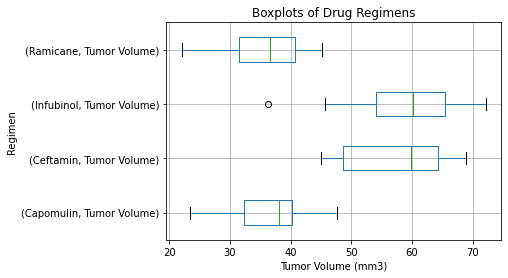

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplottable = Dataframefinalvolume.groupby(["Drug Regimen"])
boxplottable.boxplot(subplots=False, vert = False)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Regimen")
plt.title("Boxplots of Drug Regimens")
plt.show()

## Line and Scatter Plots

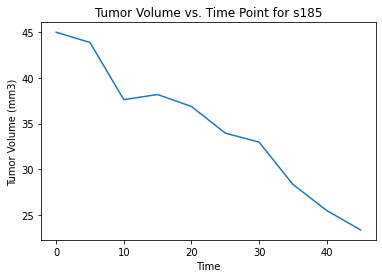

In [63]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulinmouse = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
Capomulinmousetable185 = Capomulinmouse.loc[Capomulinmouse['Mouse ID'] == "s185"]
plt.plot(Capomulinmousetable185["Timepoint"], Capomulinmousetable185["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point for s185")
plt.show()

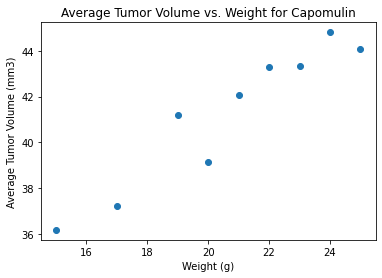

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulinmousescatter = pd.DataFrame(Capomulinmouse.groupby("Weight (g)").mean())
plt.scatter(Capomulinmousescatter.index, Capomulinmousescatter["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Capomulin")
plt.show()

## Correlation and Regression

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corcoefficient = st.pearsonr(Capomulinmousescatter.index, Capomulinmousescatter["Tumor Volume (mm3)"])

print(corcoefficient[0])

0.9505243961855269


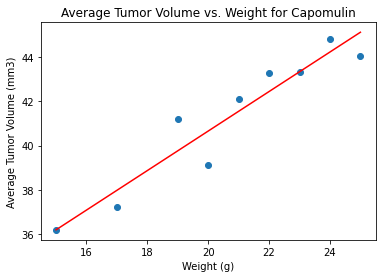

In [57]:
(slope, intercept, rvaluem, pvalue, stderr) = st.linregress(Capomulinmousescatter.index, Capomulinmousescatter["Tumor Volume (mm3)"])
regress_values = (Capomulinmousescatter.index * slope) + intercept
plt.plot(Capomulinmousescatter.index, regress_values, color = "r")
plt.scatter(Capomulinmousescatter.index, Capomulinmousescatter["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Capomulin")
plt.show()